# Packages

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler

# <center>Loading the Dataset</center>

In [6]:
data = pd.read_csv("./data/Github Repo Dataset.csv")
data.shape


(215029, 24)

There are $2,15,029$ observations and $24$ features in the dataset.

In [7]:
data.head()


Name  \
0                 freeCodeCamp   
1       free-programming-books   
2                      awesome   
3                      996.ICU   
4  coding-interview-university   

                                         Description  \
0  freeCodeCamp.org's open-source codebase and cu...   
1         :books: Freely available programming books   
2  😎 Awesome lists about all kinds of interesting...   
3  Repo for counting stars and contributing. Pres...   
4  A complete computer science study plan to beco...   

                                                 URL            Created At  \
0       https://github.com/freeCodeCamp/freeCodeCamp  2014-12-24T17:49:19Z   
1  https://github.com/EbookFoundation/free-progra...  2013-10-11T06:50:37Z   
2            https://github.com/sindresorhus/awesome  2014-07-11T13:42:37Z   
3                  https://github.com/996icu/996.ICU  2019-03-26T07:31:14Z   
4  https://github.com/jwasham/coding-interview-un...  2016-06-06T02:34:12Z   

             Updated At                                           Homepage  \
0  2023-09-21T11:32:33Z                http://contribute.freecodecamp.org/   
1  2023-09-21T11:09:25Z  https://ebookfoundation.github.io/free-program...   
2  2023-09-21T11:18:22Z                                                NaN   
3  2023-09-21T08:09:01Z                                    https://996.icu   
4  2023-09-21T10:54:48Z                                                NaN   

     Size   Stars  Forks  Issues  ...  Has Issues Has Projects Has Downloads  \
0  387451  374074  33599     248  ...        True         True          True   
1   17087  298393  57194      46  ...        True        False          True   
2    1441  269997  26485      61  ...        True        False          True   
3  187799  267901  21497   16712  ...       False        False          True   
4   20998  265161  69434      56  ...        True        False          True   

  Has Wiki  Has Pages  Has Discussions  Is Fork  Is Archived  Is Template  \
0    False       True            False    False        False        False   
1    False       True            False    False        False        False   
2    False       True            False    False        False        False   
3    False      False            False    False         True        False   
4    False      False            False    False        False        False   

   Default Branch  
0            main  
1            main  
2            main  
3          master  
4            main  

[5 rows x 24 columns]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215029 entries, 0 to 215028
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Name             215027 non-null  object
 1   Description      206997 non-null  object
 2   URL              215029 non-null  object
 3   Created At       215029 non-null  object
 4   Updated At       215029 non-null  object
 5   Homepage         78390 non-null   object
 6   Size             215029 non-null  int64 
 7   Stars            215029 non-null  int64 
 8   Forks            215029 non-null  int64 
 9   Issues           215029 non-null  int64 
 10  Watchers         215029 non-null  int64 
 11  Language         198953 non-null  object
 12  License          161990 non-null  object
 13  Topics           215029 non-null  object
 14  Has Issues       215029 non-null  bool  
 15  Has Projects     215029 non-null  bool  
 16  Has Downloads    215029 non-null  bool  
 17  Has Wiki  

There 9 boolean features, 5 integer feature and 10 object or string features.

In [9]:
data.duplicated().sum()


0

There are 0 duplicate rows

In [10]:
data.describe(include='int64').T


count          mean            std    min    25%     50%  \
Size      215029.0  54282.700106  702397.849095    0.0  378.0  2389.0   
Stars     215029.0   1115.085142    3992.372050  167.0  237.0   377.0   
Forks     215029.0    234.207637    1242.967451    0.0   39.0    79.0   
Issues    215029.0     37.925178     196.508610    0.0    3.0    10.0   
Watchers  215029.0   1115.085142    3992.372050  167.0  237.0   377.0   

              75%          max  
Size      15282.0  105078627.0  
Stars       797.0     374074.0  
Forks       174.0     243339.0  
Issues       28.0      26543.0  
Watchers    797.0     374074.0

The max value of all feature is very large compared to its quartile, indicating outliers are present.

In [11]:
def plot_missing_values(df_nl):
    temp = df_nl.isna().sum().sort_values(ascending=False)
    temp = temp[temp.values > 0]
    plt.bar(temp.index, temp.values, color='#c1b5fd')
    plt.xlabel('Features')
    plt.ylabel("Number of Missing Values")
    plt.title("Missing Values in Each Column")
    for i, v in enumerate(temp.values):
        plt.text(i,v+0.1, str(v), ha='center',va='bottom')
    

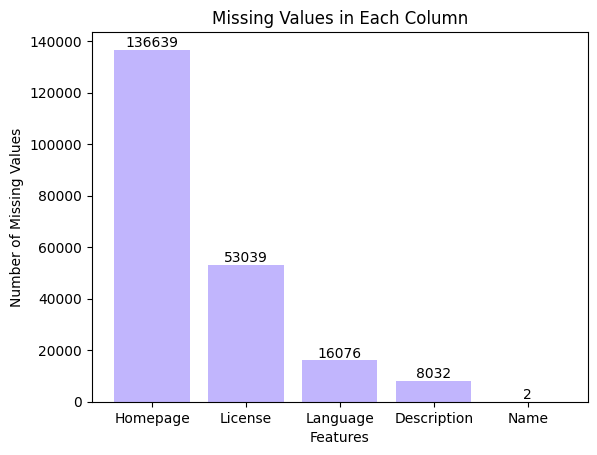

In [12]:
plot_missing_values(data)

Only object features have missing values in them.

We will create a copy of the dataset for working.

In [13]:
df = data.copy()



As some features of spaces in their names,  we would rename the features.

In [14]:
col_map = {
    'Created At':'CreationDate', 
    'Updated At':'LastUpdatedOn',
    'Has Issues':'HasIssues', 
    'Has Wiki':'HasWiki', 
    'Has Projects':'HasProjects',
    'Has Pages':'HasPages', 
    'Has Downloads':'HasDownloads',
    'Has Discussions':'HasDiscussions', 
    'Is Fork':'IsForked', 
    'Is Archived':'IsArchived',
    'Is Template':'IsTemplate'
}

df.rename(columns=col_map,inplace=True)


As the data is huge to increase the processing we would change the `int64` datatype to `int32`, if and only if the summary of the data inside remains the same

In [15]:
temp = df.select_dtypes('int64').describe()

In [16]:
int64_columns = df.select_dtypes('int64').columns

In [17]:
df_test = df[int64_columns].astype('int32')
df_test.describe() == temp

Size  Stars  Forks  Issues  Watchers
count  True   True   True    True      True
mean   True   True   True    True      True
std    True   True   True    True      True
min    True   True   True    True      True
25%    True   True   True    True      True
50%    True   True   True    True      True
75%    True   True   True    True      True
max    True   True   True    True      True

So we change the datatypes.

In [18]:
df[int64_columns] = df[int64_columns].astype('int32')

In [19]:
def reset_df():
    rf = data.copy()
    
    int64_columns = rf.select_dtypes('int64').columns
    rf[int64_columns] = rf[int64_columns].astype('int32')

    col_map = {
    'Created At':'CreationDate', 
    'Updated At':'LastUpdatedOn',
    'Has Issues':'HasIssues', 
    'Has Wiki':'HasWiki', 
    'Has Projects':'HasProjects',
    'Has Pages':'HasPages', 
    'Has Downloads':'HasDownloads',
    'Has Discussions':'HasDiscussions', 
    'Is Fork':'IsForked', 
    'Is Archived':'IsArchived',
    'Is Template':'IsTemplate'
}

    rf.rename(columns=col_map,inplace=True)
    return rf
df = reset_df()

# <center>Handling Missing Values</center>

Features with null values
- Homepage
- License
- Language
- Description
- Name

All of them are of object datatype, to analyze them we would require NLP techniques. Therefore we would drop all these columns.

In [20]:
null_features = ['Homepage','License','Language','Name','Description']

In [21]:
df[null_features].sample(10)


Homepage      License    Language  \
45406                             NaN   Apache-2.0         PHP   
78079             https://t.me/FS88ch      MPL-2.0      Python   
134184                            NaN          NaN      Racket   
148987                            NaN      GPL-3.0         PHP   
135157                            NaN   Apache-2.0         NaN   
173673                            NaN          MIT          C#   
114207                            NaN          MIT         NaN   
121763  https://code-magic.vercel.app          MIT  TypeScript   
207200  http://backpackforlaravel.com  NOASSERTION       Blade   
54014                             NaN   Apache-2.0          C#   

                                Name  \
45406   laravel-eloquent-query-cache   
78079                         spymer   
134184                        urlang   
148987                    BlockVotes   
135157             vossibility-stack   
173673                       NetJSON   
114207               awesome-fortran   
121763                    Code-Magic   
207200                      MenuCRUD   
54014                    PaddleSharp   

                                              Description  
45406   Adding cache on your Laravel Eloquent queries'...  
78079                                                Dead  
134184            Urlang is JavaScript with a sane syntax  
148987  An e-voting system based on blockchain using r...  
135157            Visibility for your open source project  
173673  Faster than Any Binary? Benchmark: http://theb...  
114207                       Awesome list of Fortran libs  
121763  Code Generator - Easily Generate CSS and Tailw...  
207200  An admin panel for menu items, using Backpack\...  
54014   .NET/C# binding for Baidu paddle inference lib...

## WordCloud on Missing Values Features

In [22]:
from wordcloud import WordCloud,STOPWORDS
from ast import literal_eval
from PIL import Image

In [23]:
import re
def generate_wordcloud(df_wc,feature):
    if feature not in df_wc:
        return f"No column named {feature} in the given data"
    words = ''
    df_wc = df_wc[df_wc.notna()]
    for i, r in df_wc.iterrows():
        text = ""
        if type(r[feature]) == str:
            if r[feature].__contains__('[') or r[feature].__contains__('{'):
                text = literal_eval(r[feature])    
            else:
                text = re.split('-| ,| \s+',r[feature])
        for word in text:
            words += word + " "

    word_cloud = WordCloud(
        colormap='binary',
        width=800,
        height=500,
        stopwords=set(STOPWORDS)
    )
    word_cloud.generate(words)

    plt.figure(figsize=(8,8),facecolor=None)
    plt.imshow(word_cloud)
    plt.title(f"{feature}:{len(words)}")
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()


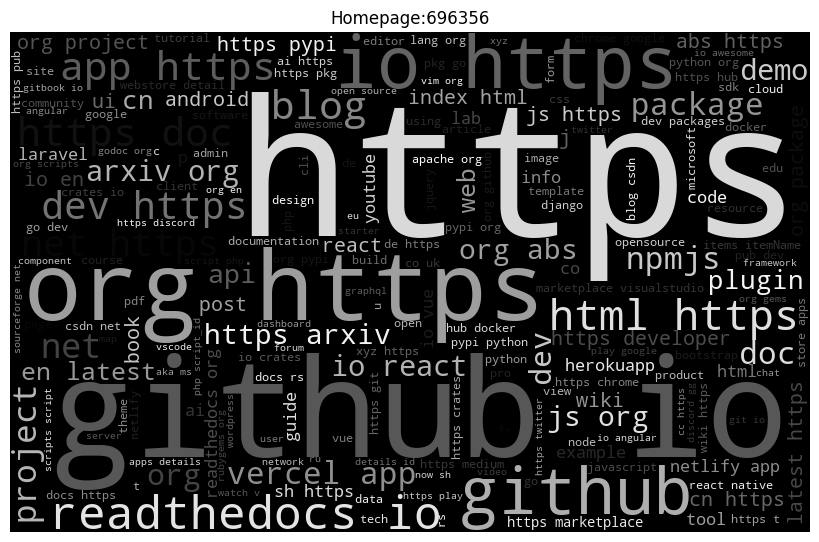

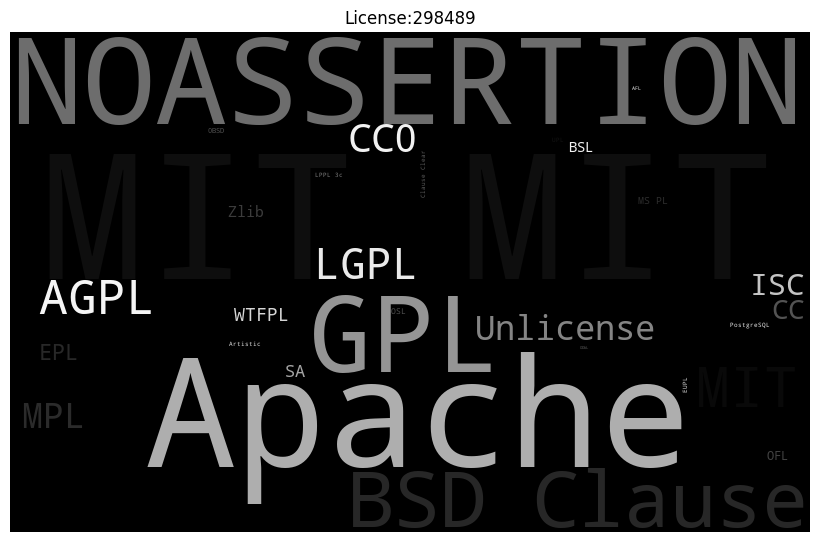

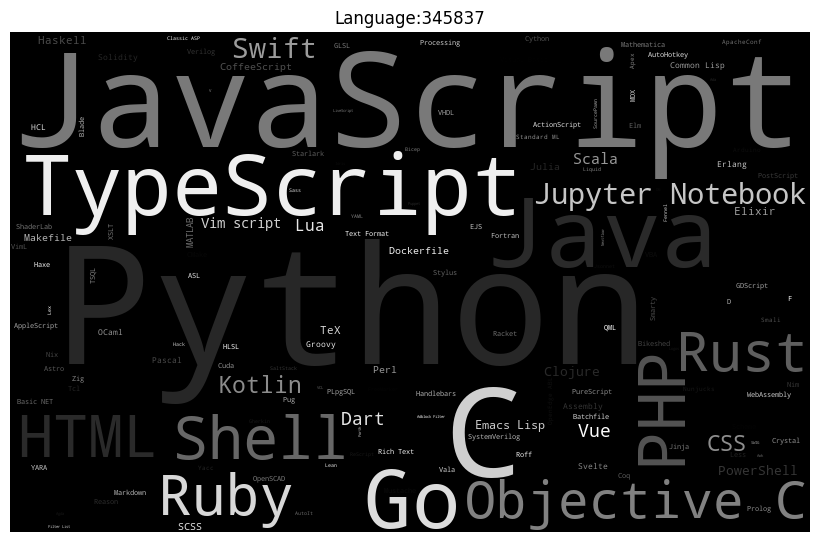

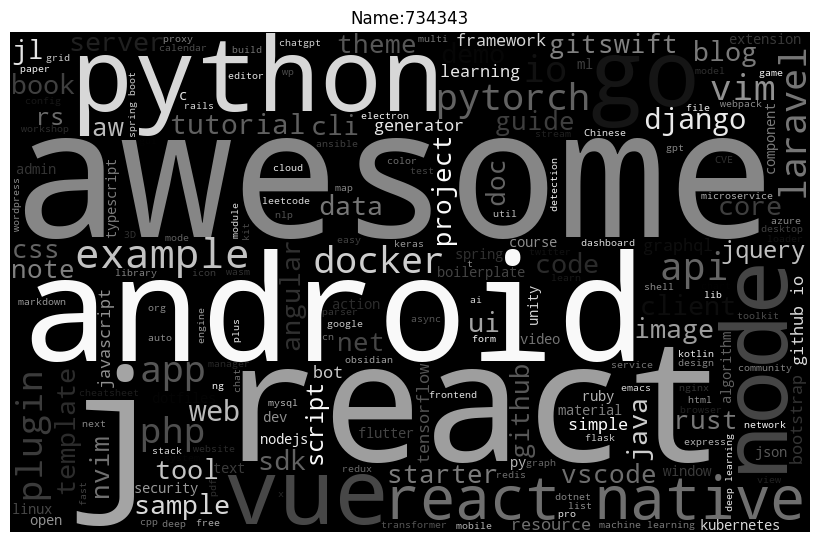

In [24]:
for f in null_features:
    if f != 'Description':
        generate_wordcloud(df.sample(frac=.25,random_state=5),f)

#  <center>Drop Features</center>

Reasons
- Missing values can only be needed to be filled using web scraping.
- The number of missing values are too large in most features
- These can only analyzed properly using NLP Technique which beyond my current skills and project scope.

In [25]:
null_features

['Homepage', 'License', 'Language', 'Name', 'Description']

<span style="color:red">We only keep the feature `Language` out of all the other features</span>

This feature can still be used using encoding, and has small number of missing values.

In [26]:
null_features.remove('Language')
null_features

['Homepage', 'License', 'Name', 'Description']

In [27]:
df.drop(null_features,axis=1,inplace=True)

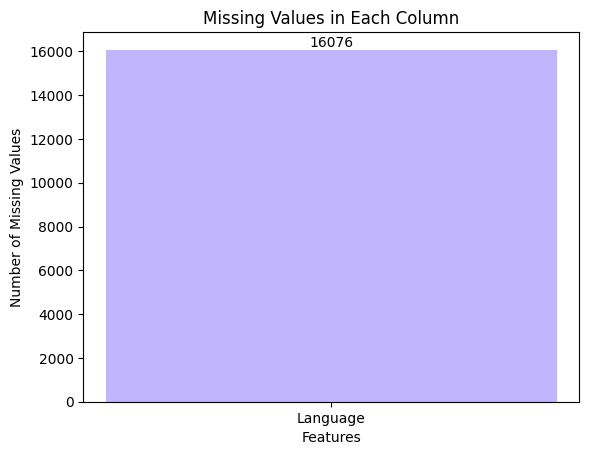

In [28]:
plot_missing_values(df)

In [29]:
# Saving a checkpoint
df_cp_removed_missing_val = df.copy()

# <center> Outliers</center>

In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215029 entries, 0 to 215028
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   URL             215029 non-null  object
 1   CreationDate    215029 non-null  object
 2   LastUpdatedOn   215029 non-null  object
 3   Size            215029 non-null  int32 
 4   Stars           215029 non-null  int32 
 5   Forks           215029 non-null  int32 
 6   Issues          215029 non-null  int32 
 7   Watchers        215029 non-null  int32 
 8   Language        198953 non-null  object
 9   Topics          215029 non-null  object
 10  HasIssues       215029 non-null  bool  
 11  HasProjects     215029 non-null  bool  
 12  HasDownloads    215029 non-null  bool  
 13  HasWiki         215029 non-null  bool  
 14  HasPages        215029 non-null  bool  
 15  HasDiscussions  215029 non-null  bool  
 16  IsForked        215029 non-null  bool  
 17  IsArchived      215029 non-nu

In [31]:
df.head()

URL          CreationDate  \
0       https://github.com/freeCodeCamp/freeCodeCamp  2014-12-24T17:49:19Z   
1  https://github.com/EbookFoundation/free-progra...  2013-10-11T06:50:37Z   
2            https://github.com/sindresorhus/awesome  2014-07-11T13:42:37Z   
3                  https://github.com/996icu/996.ICU  2019-03-26T07:31:14Z   
4  https://github.com/jwasham/coding-interview-un...  2016-06-06T02:34:12Z   

          LastUpdatedOn    Size   Stars  Forks  Issues  Watchers    Language  \
0  2023-09-21T11:32:33Z  387451  374074  33599     248    374074  TypeScript   
1  2023-09-21T11:09:25Z   17087  298393  57194      46    298393         NaN   
2  2023-09-21T11:18:22Z    1441  269997  26485      61    269997         NaN   
3  2023-09-21T08:09:01Z  187799  267901  21497   16712    267901         NaN   
4  2023-09-21T10:54:48Z   20998  265161  69434      56    265161         NaN   

                                              Topics  HasIssues  HasProjects  \
0  ['careers', 'certification', 'community', 'cur...       True         True   
1  ['books', 'education', 'hacktoberfest', 'list'...       True        False   
2  ['awesome', 'awesome-list', 'lists', 'resource...       True        False   
3                                                 []      False        False   
4  ['algorithm', 'algorithms', 'coding-interview'...       True        False   

   HasDownloads  HasWiki  HasPages  HasDiscussions  IsForked  IsArchived  \
0          True    False      True           False     False       False   
1          True    False      True           False     False       False   
2          True    False      True           False     False       False   
3          True    False     False           False     False        True   
4          True    False     False           False     False       False   

   IsTemplate Default Branch  
0       False           main  
1       False           main  
2       False           main  
3       False         master  
4       False           main

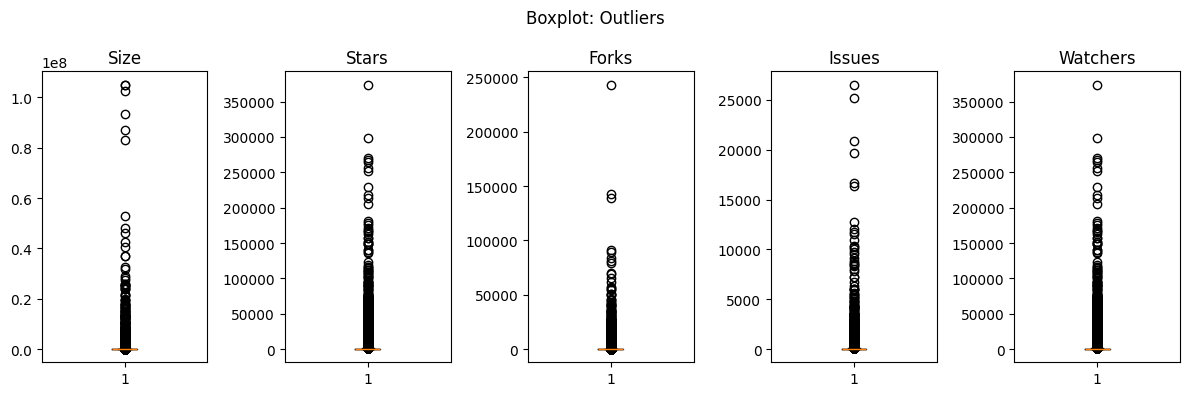

In [32]:
fig, axes = plt.subplots(nrows=1,ncols=5, figsize=(12, 4))
for i,f in enumerate(df.select_dtypes('int32')):
    axes[i].boxplot(df[f])
    axes[i].set_title(f)
fig.suptitle("Boxplot: Outliers")
plt.tight_layout()
# plt.axis('off')

Outliers are present in all numeric features, we will process the features by replacing outlier with lower fence and upper fence value which is derived using the quartiles

In [33]:
# Function to remove Outliers
def remove_outliers(dataFrame, col):
    Q1 = dataFrame[col].quantile(0.25)
    Q3 = dataFrame[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    if dataFrame[col].dtype == 'int32':
        lower_fence, upper_fence = int(lower_fence), int(upper_fence)

    outliers = dataFrame[col].where(
        (dataFrame[col] < lower_fence) & (dataFrame[col] > upper_fence))

    status = 'Removed'
    try:
        for i, d in dataFrame.iterrows():
            if d[col] < lower_fence:
                df.at[i, col] = lower_fence
            elif d[col] > upper_fence:
                df.at[i, col] = upper_fence
    except:
        status = 'Not Removed'
    finally:
        print(f"{col:<10}{status:>10}")


In [34]:
print(f"{'Column':<10}{'Status':>10}")
for c in df.select_dtypes('int32'):
    remove_outliers(df, c)


Column        Status


Size         Removed
Stars        Removed
Forks        Removed
Issues       Removed
Watchers     Removed


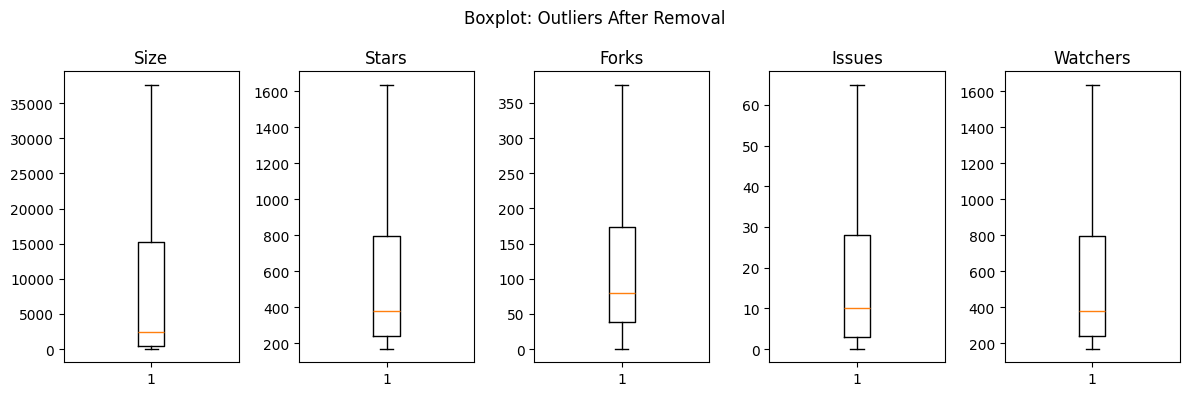

In [35]:
fig, axes = plt.subplots(nrows=1,ncols=5, figsize=(12, 4))
for i,f in enumerate(df.select_dtypes('int32')):
    axes[i].boxplot(df[f])
    axes[i].set_title(f)
fig.suptitle("Boxplot: Outliers After Removal")
plt.tight_layout()
# plt.axis('off')

In [36]:
df_cp_no_outlier=df.copy()

# <center>EDA</center>

## Categorical Features

In [37]:
df.select_dtypes('object')


URL  \
0            https://github.com/freeCodeCamp/freeCodeCamp   
1       https://github.com/EbookFoundation/free-progra...   
2                 https://github.com/sindresorhus/awesome   
3                       https://github.com/996icu/996.ICU   
4       https://github.com/jwasham/coding-interview-un...   
...                                                   ...   
215024          https://github.com/carlasouza/puppet-virt   
215025  https://github.com/zhengxiaopeng/BounceProgres...   
215026  https://github.com/eggheadio/egghead-angularjs...   
215027                https://github.com/fortharris/Pcode   
215028                  https://github.com/tj/react-hooks   

                CreationDate         LastUpdatedOn    Language  \
0       2014-12-24T17:49:19Z  2023-09-21T11:32:33Z  TypeScript   
1       2013-10-11T06:50:37Z  2023-09-21T11:09:25Z         NaN   
2       2014-07-11T13:42:37Z  2023-09-21T11:18:22Z         NaN   
3       2019-03-26T07:31:14Z  2023-09-21T08:09:01Z         NaN   
4       2016-06-06T02:34:12Z  2023-09-21T10:54:48Z         NaN   
...                      ...                   ...         ...   
215024  2010-06-06T21:42:34Z  2023-01-27T12:13:50Z        Ruby   
215025  2014-11-17T12:19:13Z  2022-11-29T16:50:03Z        Java   
215026  2014-08-04T12:56:15Z  2022-03-13T19:20:21Z  JavaScript   
215027  2013-07-29T08:55:29Z  2022-12-15T13:11:25Z      Python   
215028  2016-09-19T23:26:58Z  2023-09-01T07:10:16Z  JavaScript   

                                                   Topics Default Branch  
0       ['careers', 'certification', 'community', 'cur...           main  
1       ['books', 'education', 'hacktoberfest', 'list'...           main  
2       ['awesome', 'awesome-list', 'lists', 'resource...           main  
3                                                      []         master  
4       ['algorithm', 'algorithms', 'coding-interview'...           main  
...                                                   ...            ...  
215024                                                 []         master  
215025                                                 []         master  
215026                                                 []         master  
215027                                                 []         master  
215028                                                 []         master  

[215029 rows x 6 columns]

In [38]:
df['Default Branch'].value_counts() * 100 / df.shape[0]

Default Branch
master             75.714439
main               19.153230
develop             1.567230
dev                 0.580387
gh-pages            0.386925
                     ...    
masterv2            0.000465
release-v0.16.x     0.000465
5.6                 0.000465
release/2.4.x       0.000465
branch2.0           0.000465
Name: count, Length: 2326, dtype: float64

<span style='color:red'>We will be dropping -- `URL`,`Topics`,`Default Branch`<span>
- URL and Topics are dropped for the same reason as before, we need NLP techniques to analyse it.
- We drop Default Branch, cause it does not affect the popularity of a repository and as well as has very less unique values meaning many people use the default ones.

In [39]:
df.drop(['URL','Topics','Default Branch'],axis=1,inplace=True)

We will only extract the years from the data and then we creates groups of them

In [40]:
# Convert date to datetime and extract `year`
df['CreationDate'] = pd.to_datetime(df['CreationDate'])
df['LastUpdatedOn'] = pd.to_datetime(df['LastUpdatedOn'])


In [41]:
df['CreatedYear'] = pd.DatetimeIndex(df['CreationDate']).year
df['UpdatedYear'] = pd.DatetimeIndex(df['LastUpdatedOn']).year


In [42]:
df['CreateCategory'] = pd.cut(df['CreatedYear'],3)
df[['CreatedYear','CreateCategory']].sample(10)

CreatedYear        CreateCategory
131673         2020    (2017.667, 2023.0]
78644          2014  (2012.333, 2017.667]
23648          2019    (2017.667, 2023.0]
44028          2010  (2006.984, 2012.333]
186463         2017  (2012.333, 2017.667]
33744          2020    (2017.667, 2023.0]
134411         2015  (2012.333, 2017.667]
85278          2016  (2012.333, 2017.667]
144298         2015  (2012.333, 2017.667]
22406          2017  (2012.333, 2017.667]

In [43]:
df['UpdateCategory'] = pd.cut(df['UpdatedYear'],3)
df[['UpdatedYear','UpdateCategory']].sample(4)

UpdatedYear      UpdateCategory
117830         2023  (2021.667, 2023.0]
14707          2023  (2021.667, 2023.0]
159348         2023  (2021.667, 2023.0]
149455         2023  (2021.667, 2023.0]

In [44]:
df[['CreatedYear','UpdatedYear']].describe().T

count         mean       std     min     25%     50%     75%  \
CreatedYear  215029.0  2016.870311  3.225603  2007.0  2015.0  2017.0  2019.0   
UpdatedYear  215029.0  2022.992331  0.099489  2019.0  2023.0  2023.0  2023.0   

                max  
CreatedYear  2023.0  
UpdatedYear  2023.0

For language, I will try to create category according to the usage of these language in the repository.

While doing this, we can ignore the missing value as it amount to just $7.47\%$ of the whole data.

In [45]:
df['Language'].isna().sum() *100 / df.shape[0]

7.4762008845318535

In [46]:
lang = df[['Language']].loc[df['Language'].notna()]
lang
# df['Language'].dropna(inplace=True)

Language
0       TypeScript
5           Python
6       TypeScript
7           Python
9       JavaScript
...            ...
215024        Ruby
215025        Java
215026  JavaScript
215027      Python
215028  JavaScript

[198953 rows x 1 columns]

Plotting language according to their usage

In [47]:
count_lang = df['Language'].value_counts().sort_values(ascending=False)
px.bar(x=count_lang.index, y=count_lang).update_layout(xaxis_title='Languages',yaxis_title='Count',title='Which Language was used how much ?')

As we can see that the above plot is highly positively skewed, dropping some values won't affect the data. As the the number of missing values is low in this feature we will drop all missing values

In [48]:
df.dropna(inplace=True)

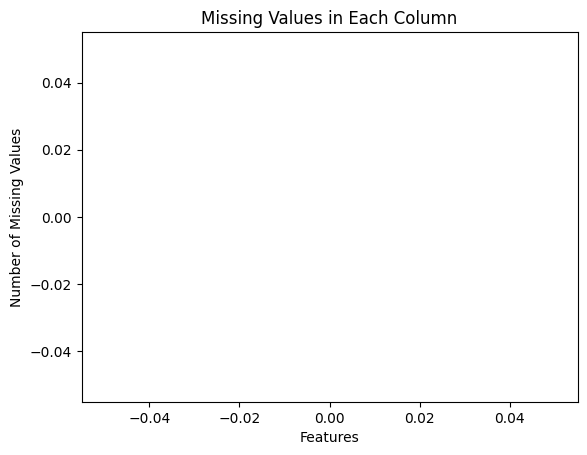

In [49]:
plot_missing_values(df)

We will consider this data to discern which language that the repoistory used were popular.

This data is based from **StackOverFlow Survey 2023** was taken from [Statista](https://www.statista.com/statistics/793628/worldwide-developer-survey-most-used-languages/). It contains the top 50 languages of 2023

In [50]:
top50_lang = pd.read_csv("data/programming-languages-2023.csv")
px.bar(x=top50_lang.Language, y=top50_lang.Percentage).update_layout(xaxis_title='Language',yaxis_title='Percentage',title='Popular Languages of 2023')

In [51]:
popular_lang = list(top50_lang.Language)
for i, d in df.iterrows():
    if d['Language'] in popular_lang:
            df.at[i, 'IsPopular'] = True
    else:
          df.at[i,'IsPopular'] = False


In [52]:
df["IsPopular"] = df['IsPopular'].astype("bool")

In [53]:
df[['Language','IsPopular']].sample(7)


Language  IsPopular
75536   JavaScript       True
147359      Python       True
100563  Vim script      False
5119            C#       True
45130   TypeScript       True
98720         Rust       True
165162  JavaScript       True

In [54]:
df_cp_cat_adjusted = df.copy()

## Numeric Features

In [55]:
df.select_dtypes(['int32'])

Size  Stars  Forks  Issues  Watchers  CreatedYear  UpdatedYear
0       37638   1637    376      65      1637         2014         2023
5        5088   1637    376      65      1637         2016         2023
6       37638   1637    376      65      1637         2017         2023
7       11187   1637    376      65      1637         2017         2023
9       37638   1637    376      65      1637         2013         2023
...       ...    ...    ...     ...       ...          ...          ...
215024    573    167     73      11       167         2010         2023
215025   2219    167     36       2       167         2014         2022
215026     81    167    221       2       167         2014         2022
215027  15617    167     24       4       167         2013         2022
215028      3    167      9       3       167         2016         2023

[198953 rows x 7 columns]

In [56]:
int_feat = ['Size', 'Stars', 'Forks', 'Issues', 'Watchers']

<Figure size 640x480 with 0 Axes>

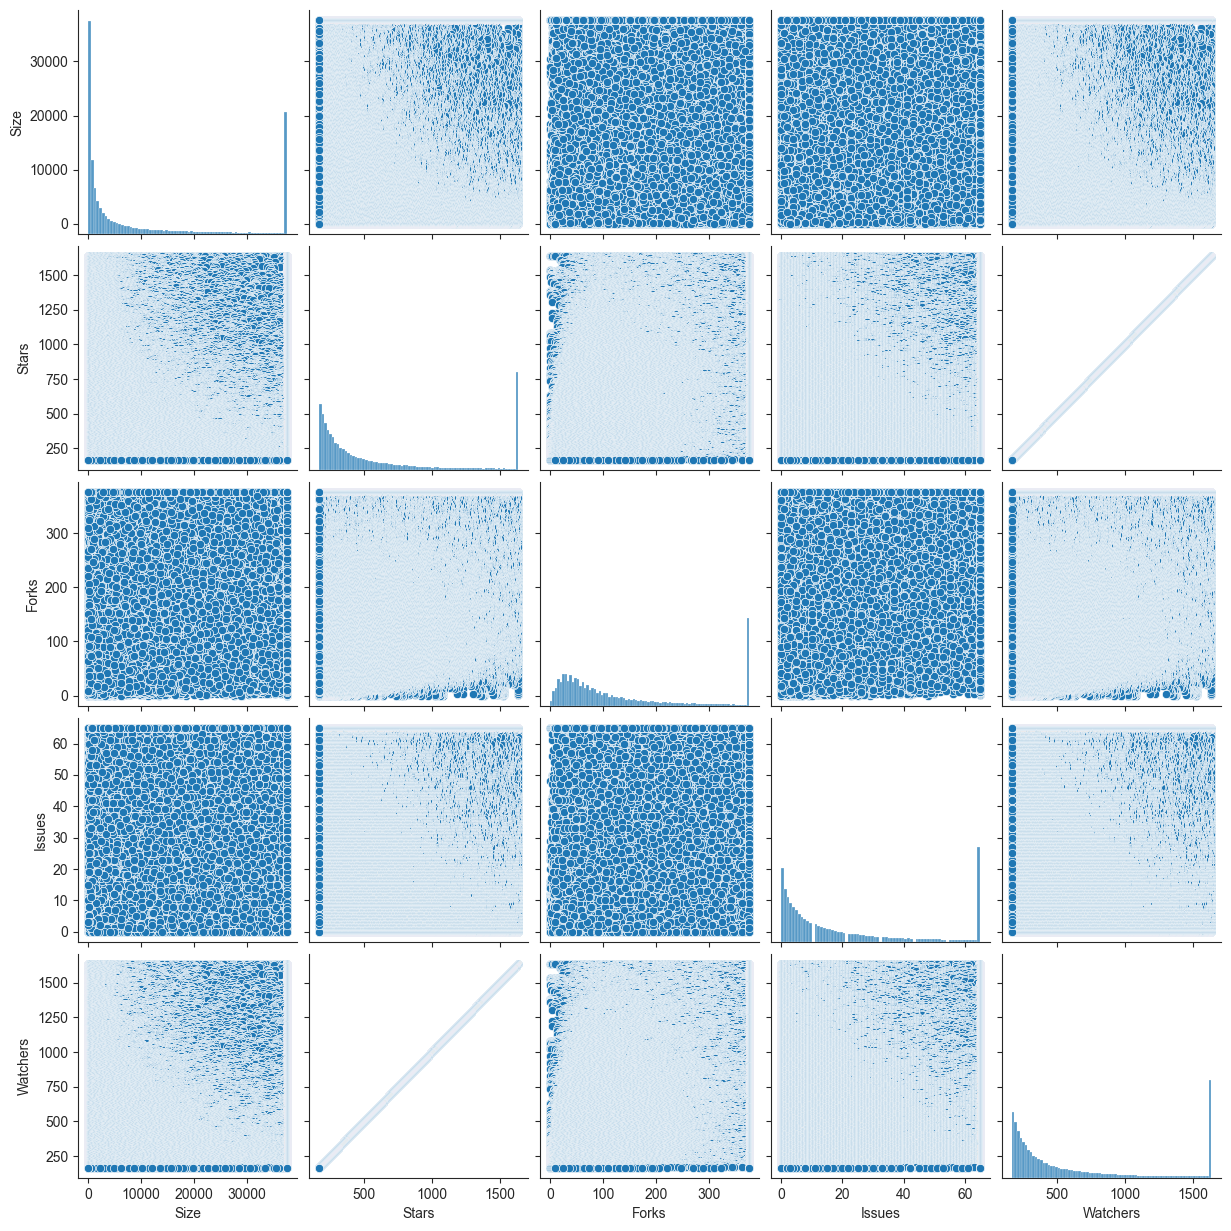

In [57]:
sns.set_style('ticks')
sns.despine()
sns.pairplot(df[int_feat])

<Figure size 640x480 with 0 Axes>

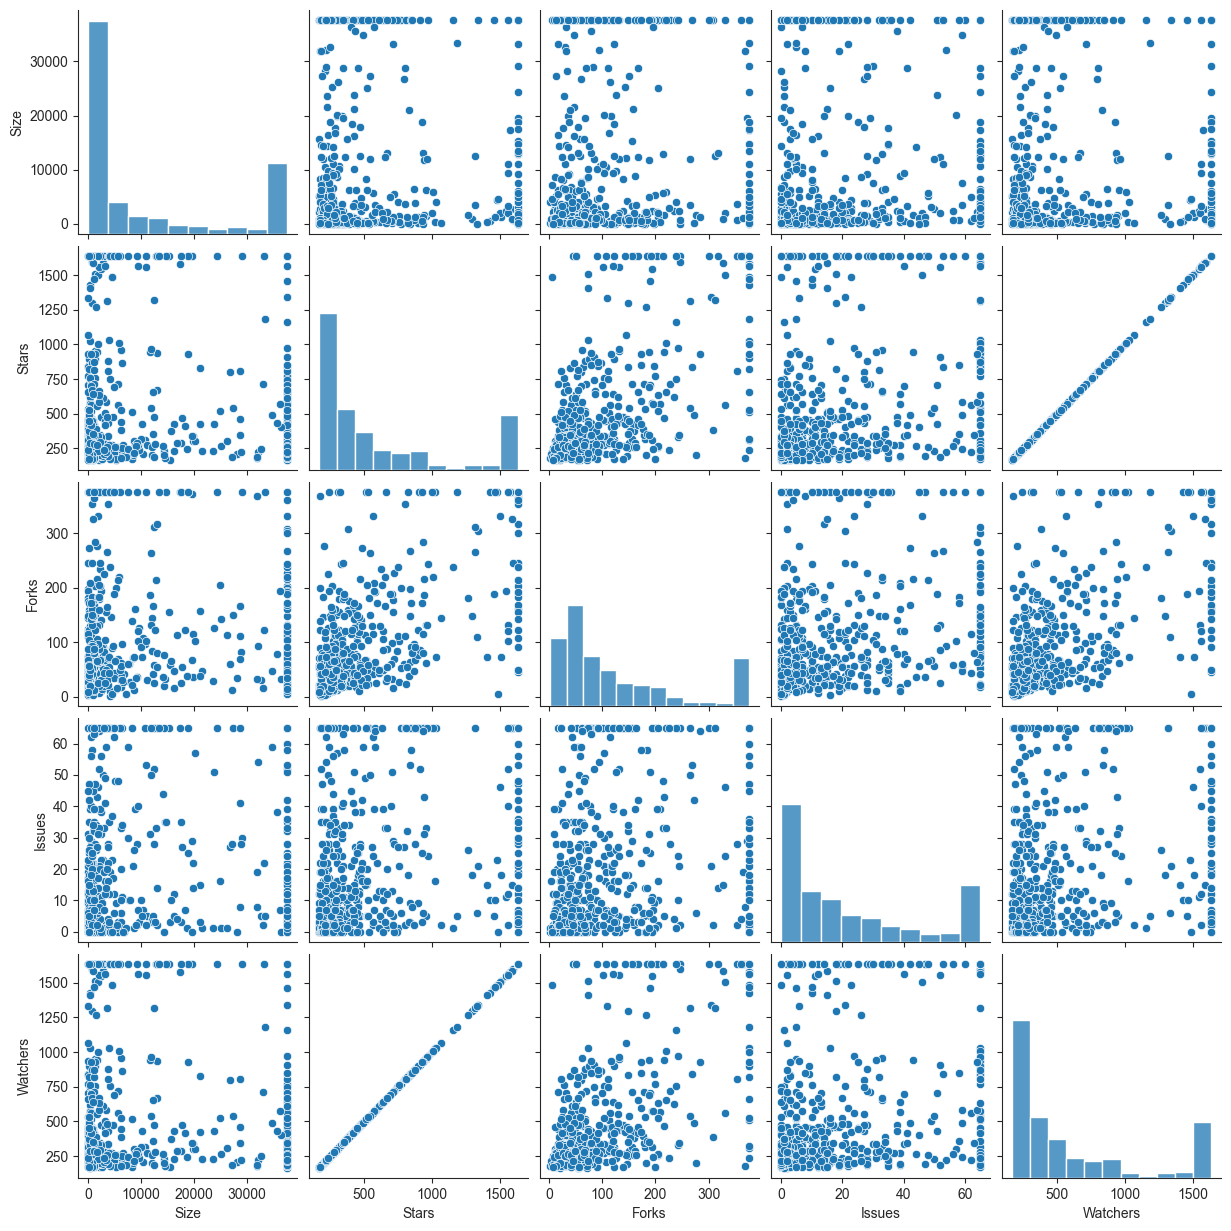

In [58]:
sns.set_style('ticks')
sns.despine()
sns.pairplot(df[int_feat].sample(500))

In [59]:
corr_mat_int = df[int_feat].corr(method='pearson')
px.imshow(
    corr_mat_int,
    text_auto=True,
    aspect='auto',
    color_continuous_scale='purp'
)

High Correlation Between
- Forks, Watchers
- Forks, Stars


Since none of the features have correlation of above 0.9 and 0.8, we won't have to drop this features.

### Normalization

In [60]:
df[int_feat].describe().T

count          mean           std    min    25%     50%      75%  \
Size      198953.0  10330.912311  13839.886021    0.0  441.0  2613.0  15900.0   
Stars     198953.0    601.784834    493.080452  167.0  236.0   375.0    791.0   
Forks     198953.0    126.060436    116.280810    0.0   40.0    79.0    174.0   
Issues    198953.0     19.986972     21.781919    0.0    3.0    11.0     30.0   
Watchers  198953.0    601.784834    493.080452  167.0  236.0   375.0    791.0   

              max  
Size      37638.0  
Stars      1637.0  
Forks       376.0  
Issues       65.0  
Watchers   1637.0

In [61]:
df_test[int_feat].describe().T

count          mean            std    min    25%     50%  \
Size      215029.0  54282.700106  702397.849095    0.0  378.0  2389.0   
Stars     215029.0   1115.085142    3992.372050  167.0  237.0   377.0   
Forks     215029.0    234.207637    1242.967451    0.0   39.0    79.0   
Issues    215029.0     37.925178     196.508610    0.0    3.0    10.0   
Watchers  215029.0   1115.085142    3992.372050  167.0  237.0   377.0   

              75%          max  
Size      15282.0  105078627.0  
Stars       797.0     374074.0  
Forks       174.0     243339.0  
Issues       28.0      26543.0  
Watchers    797.0     374074.0

We would apply `yeojohnson` transformation on features which have zero value in them, on rest we would go with `boxcox`.

In [62]:
from scipy.stats import yeojohnson, boxcox

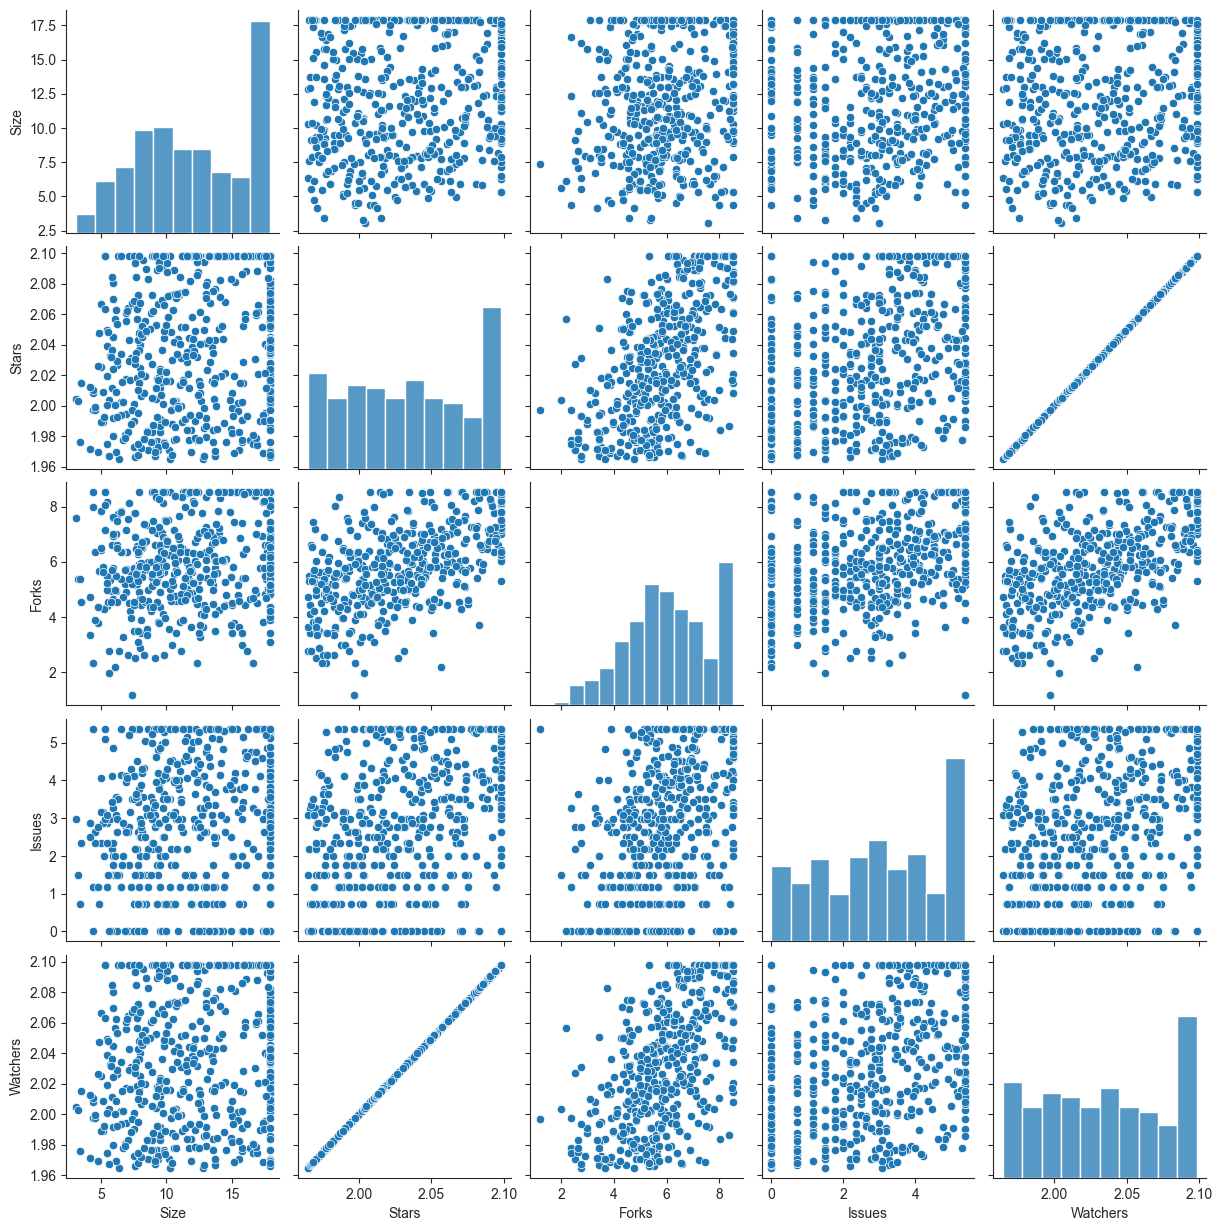

In [63]:
df_test = df.copy()
for f in int_feat:
    if min(df_test[f]) <= 0:
        td, lv = yeojohnson(df_test[f])
    else:
        td,lv = boxcox(df_test[f])
    df_test[f] = td
sns.pairplot(df_test[int_feat].sample(500))

<span style="color:red">So we won't use normalized data, as even after transformation data doesn't follow normal distribution.</span>

### Taking PCA of Integer Features

In [64]:
from sklearn.decomposition import PCA

In [65]:
scaler = StandardScaler()
int_scaled = scaler.fit_transform(df[int_feat])

In [84]:
pca_int = PCA()
compnents_int = pca_int.fit_transform(int_scaled)
labels = {
    str(i): f"PC {i+1} ({var:1f})" for i, var in enumerate(pca_int.explained_variance_ratio_ *100)
}


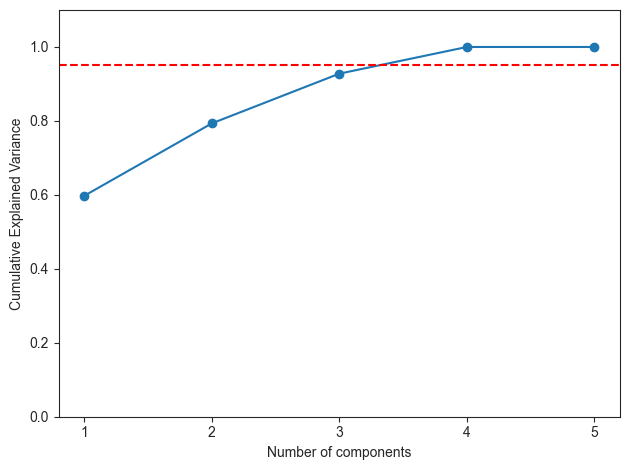

In [94]:
cumsum_pca_int = np.cumsum(pca_int.explained_variance_ratio_)
xi = range(1, len(cumsum_pca_int)+1)

plt.plot(xi, cumsum_pca_int,marker='o',linestyle='-')
plt.ylim(0.0,1.1)
plt.xlabel('Number of components')
plt.ylabel("Cumulative Explained Variance")
plt.xticks(xi)
plt.axhline(y=0.95, color='r',linestyle='--')
plt.tight_layout()


In [88]:
labels

{'0': 'PC 1 (59.734286)',
 '1': 'PC 2 (19.593011)',
 '2': 'PC 3 (13.458940)',
 '3': 'PC 4 (7.213763)',
 '4': 'PC 5 (0.000000)'}

We will take first 3 PCA. They contain $95\%$ of the information.

In [129]:
int_pca = pd.DataFrame(compnents_int,columns=['IPCA'+str(i+1) for i in range(5)])
int_pca.drop(['IPCA4','IPCA5'],axis=1,inplace=True)

In [130]:
int_pca.columns

Index(['IPCA1', 'IPCA2', 'IPCA3'], dtype='object')

<Figure size 640x480 with 0 Axes>

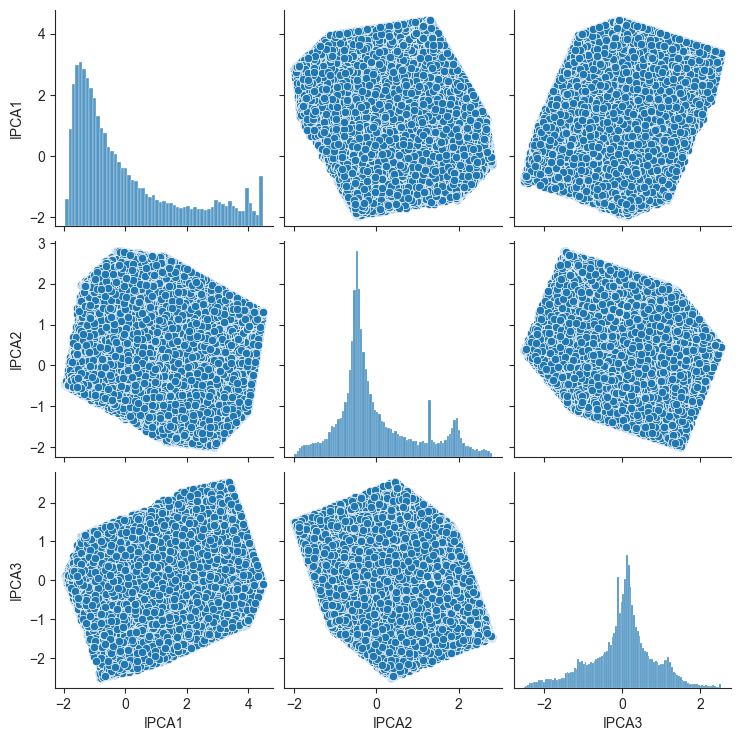

In [132]:
sns.set_style('ticks')
sns.despine()
sns.pairplot(int_pca.sample(frac=.25))

In [ ]:
df.join(int_pca,how='inner')


In [165]:
all(df.isna().sum() > 0)

False

In [158]:
df_cp_int_pca = df.copy()

## Boolean Features

In [178]:
bool_feat = df.select_dtypes('bool')
bool_feat

HasIssues  HasProjects  HasDownloads  HasWiki  HasPages  \
0            True         True          True    False      True   
5            True        False          True    False     False   
6            True        False          True     True      True   
7            True         True          True     True     False   
9            True         True          True     True      True   
...           ...          ...           ...      ...       ...   
198948       True         True          True     True     False   
198949       True         True          True     True     False   
198950       True         True          True     True     False   
198951       True         True          True     True     False   
198952       True        False          True    False     False   

        HasDiscussions  IsArchived  IsTemplate  IsPopular  
0                False       False       False       True  
5                False       False       False       True  
6                False       False       False       True  
7                False       False       False       True  
9                False       False       False       True  
...                ...         ...         ...        ...  
198948           False       False       False      False  
198949           False       False       False       True  
198950           False       False       False       True  
198951           False       False       False       True  
198952           False       False       False      False  

[183956 rows x 9 columns]

In [173]:
corr_mat_bool = bool_feat.corr()
px.imshow(
    corr_mat_bool,
    text_auto=True,
    aspect='auto',
    color_continuous_scale='purp'
)

High Correlation Between 
- HasProjects, HasWiki

In [174]:
df['IsForked'].value_counts()

IsForked
False    183956
Name: count, dtype: int64

In [175]:
df.drop('IsForked',axis=1,inplace=True)

<span style='color:red'>We will drop `IsForked` because it only contains `False` values</span>

# Encoding

In [179]:
df.head()

CreationDate             LastUpdatedOn   Size  Stars  Forks  \
0 2014-12-24 17:49:19+00:00 2023-09-21 11:32:33+00:00  37638   1637    376   
5 2016-03-20 23:49:42+00:00 2023-09-21 11:22:06+00:00   5088   1637    376   
6 2017-03-15 13:45:52+00:00 2023-09-21 11:32:17+00:00  37638   1637    376   
7 2017-02-26 16:15:28+00:00 2023-09-21 11:32:17+00:00  11187   1637    376   
9 2013-05-24 16:15:54+00:00 2023-09-21 11:37:15+00:00  37638   1637    376   

   Issues  Watchers    Language  HasIssues  HasProjects  ...  IsArchived  \
0      65      1637  TypeScript       True         True  ...       False   
5      65      1637      Python       True        False  ...       False   
6      65      1637  TypeScript       True        False  ...       False   
7      65      1637      Python       True         True  ...       False   
9      65      1637  JavaScript       True         True  ...       False   

   IsTemplate  CreatedYear  UpdatedYear        CreateCategory  \
0       False         2014         2023  (2012.333, 2017.667]   
5       False         2016         2023  (2012.333, 2017.667]   
6       False         2017         2023  (2012.333, 2017.667]   
7       False         2017         2023  (2012.333, 2017.667]   
9       False         2013         2023  (2012.333, 2017.667]   

       UpdateCategory  IsPopular     IPCA1     IPCA2     IPCA3  
0  (2021.667, 2023.0]       True  4.461577  1.298450 -0.086356  
5  (2021.667, 2023.0]       True  4.383835  0.927213 -0.244027  
6  (2021.667, 2023.0]       True  4.040522 -0.712199 -0.940311  
7  (2021.667, 2023.0]       True  4.461577  1.298450 -0.086356  
9  (2021.667, 2023.0]       True  4.137982 -0.246803 -0.742650  

[5 rows x 24 columns]

## One Hot

In [185]:
df.sample(1).T

81026
CreationDate    2016-03-14 03:12:34+00:00
LastUpdatedOn   2023-09-21 08:47:46+00:00
Size                                 9413
Stars                                 515
Forks                                 223
Issues                                 65
Watchers                              515
Language                            Swift
HasIssues                            True
HasProjects                          True
HasDownloads                         True
HasWiki                              True
HasPages                            False
HasDiscussions                      False
IsArchived                          False
IsTemplate                          False
CreatedYear                          2016
UpdatedYear                          2023
CreateCategory       (2012.333, 2017.667]
UpdateCategory         (2021.667, 2023.0]
IsPopular                            True
IPCA1                           -0.414657
IPCA2                             1.73637
IPCA3                            1.173336

In [186]:
cc_en = pd.get_dummies(df.CreateCategory,prefix='created').astype('int32')
df = pd.concat([df,cc_en],axis=1)

In [187]:
uc_en = pd.get_dummies(df['UpdateCategory'],prefix='updated').astype('int32')
df = pd.concat([df,uc_en],axis=1)

# Saving the Clean Data

In [189]:
df.sample(1).T

44447
CreationDate                  2016-03-04 14:12:02+00:00
LastUpdatedOn                 2023-09-19 14:53:05+00:00
Size                                                852
Stars                                               970
Forks                                               376
Issues                                               24
Watchers                                            970
Language                                         Python
HasIssues                                          True
HasProjects                                        True
HasDownloads                                       True
HasWiki                                            True
HasPages                                          False
HasDiscussions                                    False
IsArchived                                        False
IsTemplate                                        False
CreatedYear                                        2016
UpdatedYear                                        2023
CreateCategory                     (2012.333, 2017.667]
UpdateCategory                       (2021.667, 2023.0]
IsPopular                                          True
IPCA1                                          1.031865
IPCA2                                         -0.856004
IPCA3                                         -0.167151
created_(2006.984, 2012.333]                          0
created_(2012.333, 2017.667]                          1
created_(2017.667, 2023.0]                            0
updated_(2018.996, 2020.333]                          0
updated_(2020.333, 2021.667]                          0
updated_(2021.667, 2023.0]                            1

In [191]:
df_clean = df.drop(['CreationDate', 'LastUpdatedOn','Language','CreateCategory',
       'UpdateCategory','Size','Stars', 'Forks', 'Issues', 'Watchers'] ,axis=1)

In [194]:
all(df_clean.isna().sum() > 0)

False

In [192]:
df_clean.to_csv("./data/CleanGithubRepo.csv",index=False)

---